In [3]:
import particle_motion
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Поиск траектории

In [4]:
solver_name = "PusherBorisRR"
field_name = "CrossEMField"
position = [0.0, 0.0, 0.0]
velocity = [0.1, 0.1, 0.0]
mass = 1.0
charge = - 1.0
electric_field = [0.0, 0.0, 0.0]
magnetic_field = [0.0, 1.0, 0.0]
time_start = 0.0
time_end = 200.0
dt = 0.1

result = particle_motion.trajectory_array(
    solver_name, field_name, position, velocity,
    mass, charge, electric_field, magnetic_field, time_start, time_end, dt
)


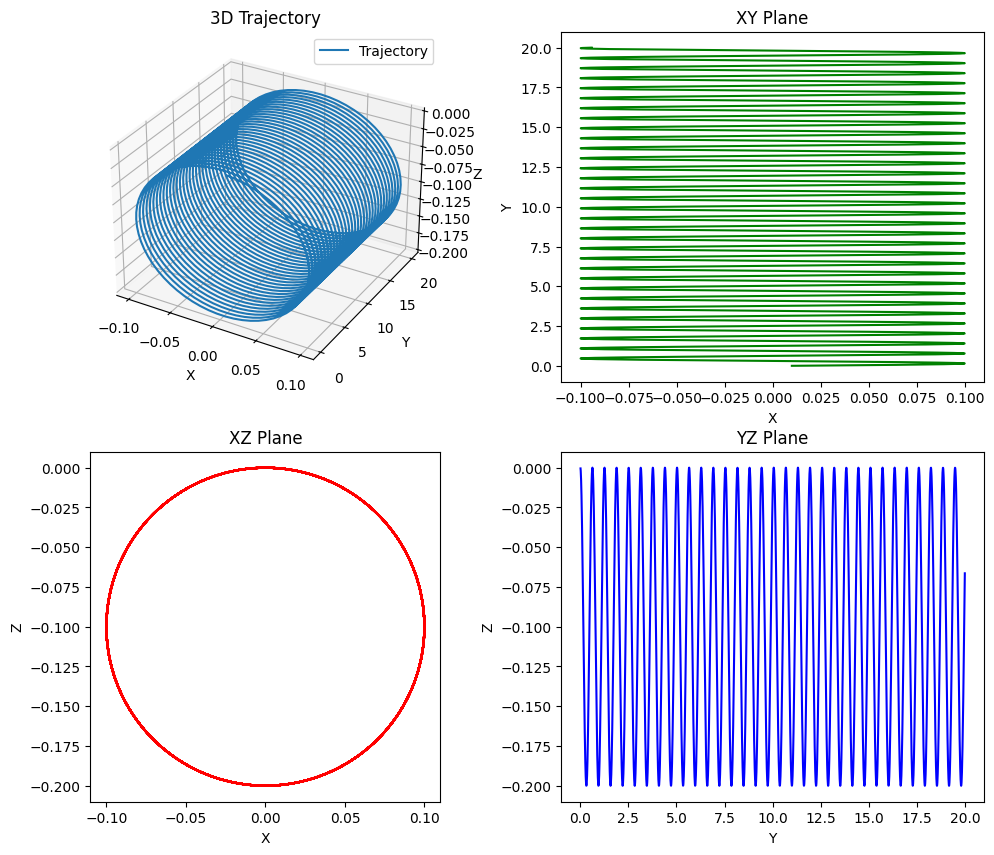

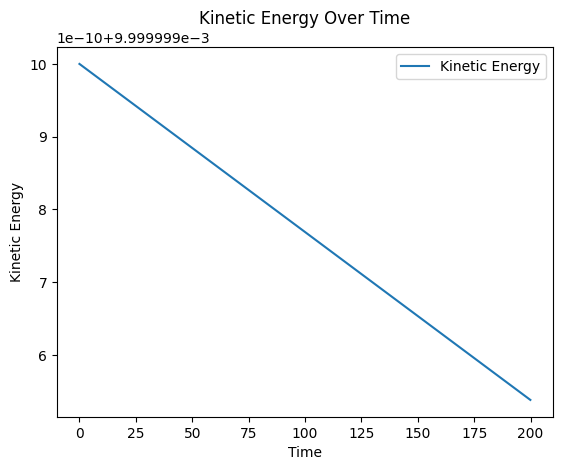

In [5]:
particle_motion.writer_trajectory(result)

# Построение спектра

In [6]:
phi = 0
theta = np.pi/2
w_start = 0.1
w_end = 4.0
dw = 0.005
dtheta = 0.05

spectrum = particle_motion.spectrum_array(result, phi, theta, w_start, w_end, dw)


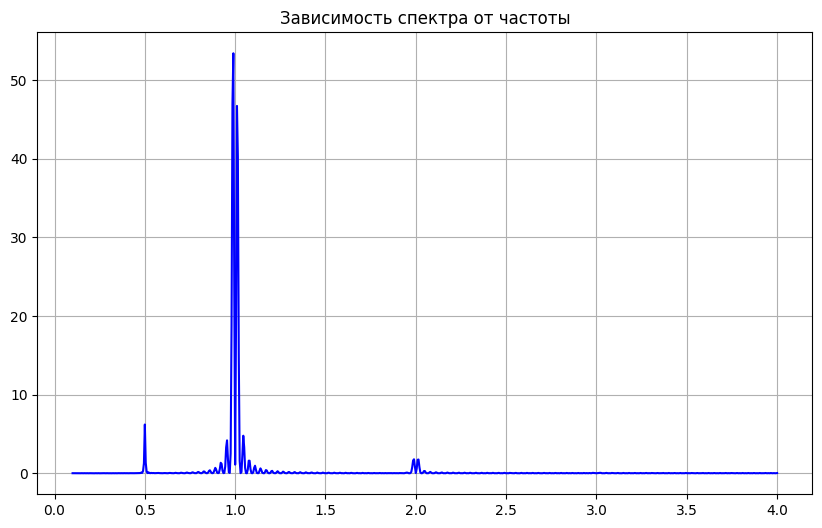

In [7]:
particle_motion.writer_spectrum(spectrum)

# Построение цветовой карты

In [8]:
color_map = particle_motion.color_map_array(result, phi, theta, w_start, w_end, dw, dtheta)


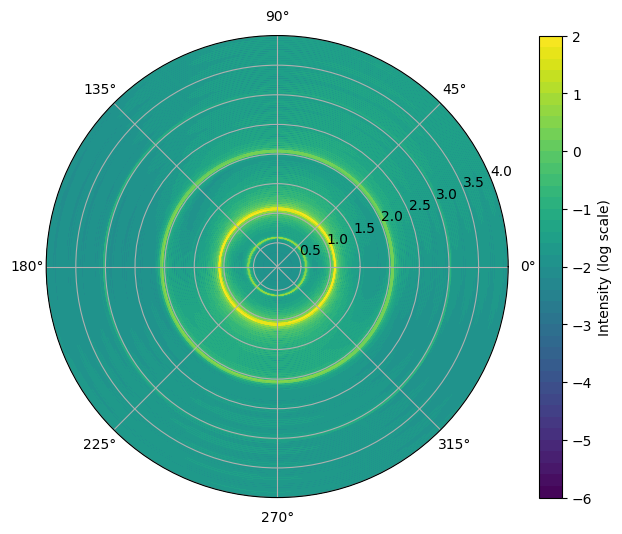

In [9]:
particle_motion.writer_color_map(color_map, w_end)